## Simple EDA for get insight

Terima kasih banyak kepada team BRI Data Hackathon yang sudah menyelenggarakan event ini. Notebook ini dibuat hanya untuk sharing, tanpa ada maksud lain. Semoga ada banyak peserta lainnya yang mensharingkan notebooknya agar kita semua bisa belajar :)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = [16, 8]
pd.set_option('display.max_columns', None)

In [2]:
sub_df = pd.read_csv('/kaggle/input/bri-data-hackathon-people-analytic/sample_submission.csv')
train_df = pd.read_csv('/kaggle/input/bri-data-hackathon-people-analytic/train.csv')
test_df = pd.read_csv('/kaggle/input/bri-data-hackathon-people-analytic/test.csv')

print('Train shape:', train_df.shape)
print('Test shape:', test_df.shape)

Train shape: (22005, 30)
Test shape: (6000, 29)


In [3]:
# number_of_dependences is enough, add male / female will be redundant
train_df = train_df.drop(['number_of_dependences (male)', 'number_of_dependences (female)'], axis=1)
test_df = test_df.drop(['number_of_dependences (male)', 'number_of_dependences (female)'], axis=1)

train_df['age'] = 2020 - train_df['age']
test_df['age'] = 2020 - test_df['age']

### Features that have missing values - Train data

In [4]:
null_col = train_df.columns[train_df.isna().any()]

null_df = train_df[null_col].isna().sum().rename('missing rows').to_frame()
null_df['percentage'] = round(null_df['missing rows'] / train_df.shape[0] * 100, 3)
null_df['percentage'] = null_df['percentage'].astype('str')

null_df.sort_values('missing rows', ascending=False).style.background_gradient('Blues')

,missing rows,percentage
achievement_target_1,6727,30.57
achievement_target_2,6727,30.57
achievement_target_3,6727,30.57
Last_achievement_%,6302,28.639
Achievement_above_100%_during3quartal,6302,28.639
Avg_achievement_%,6289,28.58
Education_level,3608,16.396
GPA,3503,15.919
year_graduated,3503,15.919
job_duration_as_permanent_worker,2055,9.339


### But test dataset does not have missing values

In [5]:
if test_df.isna().any().sum() == 0:
    print('Test dataset does not have missing values')
else:
    print('Test dataset have missing values')

Test dataset does not have missing values


### Remove duplicated rows

In [6]:
print('Total duplicated rows:', train_df.duplicated().sum())

train_df.drop_duplicates(inplace=True)

Total duplicated rows: 123


## EDA for analysis

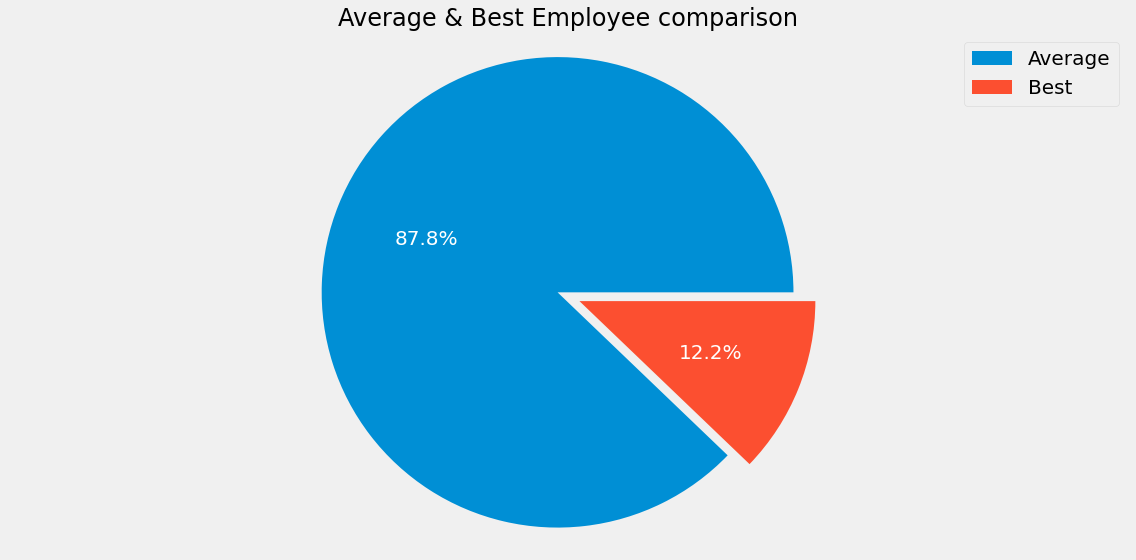

In [7]:
best_performance_comparison = train_df['Best Performance'].value_counts()

plt.pie(best_performance_comparison.values,
        labels=best_performance_comparison.index,
        autopct='%.1f%%',
        textprops={'fontsize': 20, 'color': 'white'},
        labeldistance=None,
        explode=(0.1, 0)
)

plt.title('Average & Best Employee comparison', fontsize=24)
plt.legend(['Average', 'Best'], fontsize=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

Become best employee in workplace isn't easy, it depends on a lot of factors like passion, company leadership, environment and a lot of things. Only few people from each company can give best performance. That's why we only have 12.2 % best performance employee this dataset

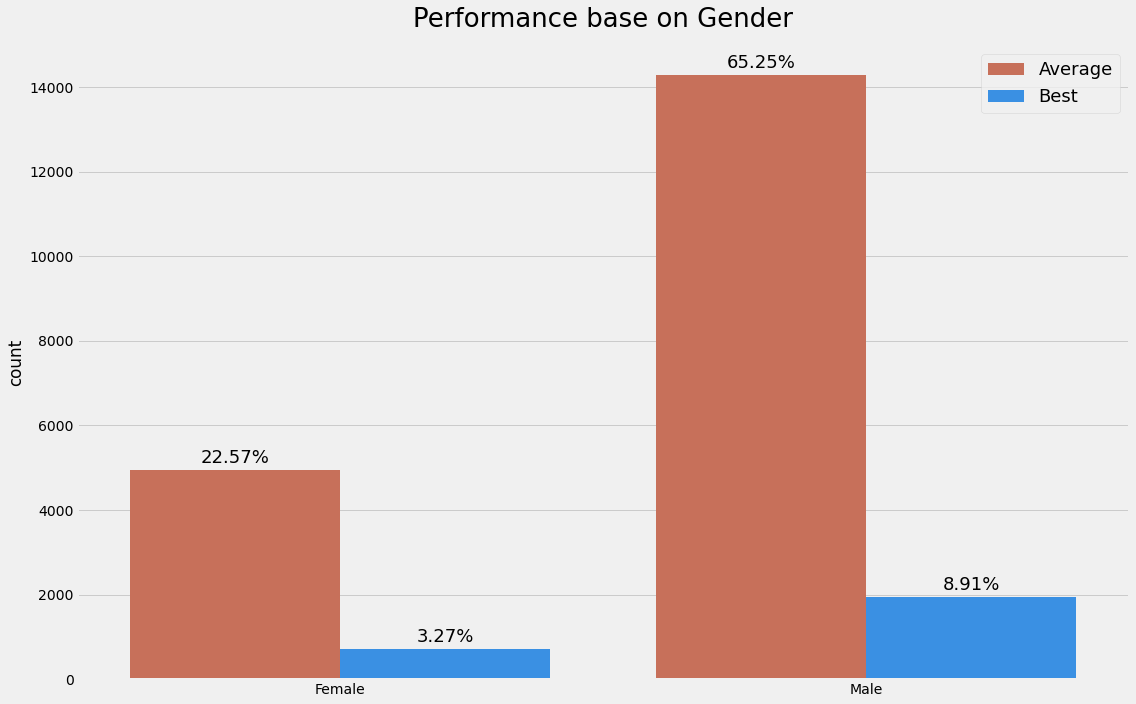

In [8]:
plt.figure(figsize=(16, 10))
axes = sns.countplot(train_df['gender'], hue=train_df['Best Performance'], palette=['#d96548', 'dodgerblue'])
axes.set_title('Performance base on Gender', fontsize=26, pad=18)

for val in axes.patches:
    pct = '{:.2f}%'.format(100 * val.get_height() / train_df.shape[0])
    xpos = val.get_x() + val.get_width() / 2.
    ypos = val.get_height()
    axes.annotate(pct, (xpos, ypos), ha='center', va='center', fontsize=18, xytext=(0, 12), textcoords='offset points')

axes.set_xlabel(None)

plt.legend(['Average', 'Best'], fontsize=18)
plt.tight_layout()
plt.show()

In [9]:
print("Best Female at work", round(3.27 / (22.57 + 3.27), 3))
print("Best Male at work", round(8.91 / (65.25 + 8.91), 3))

Best Female at work 0.127
Best Male at work 0.12


* It's seems that MALE are more productive than FEMALE, because we have more MALE in this dataset
* But if we calculate it, FEMALE are A LITTLE BIT MORE PRODUCIVE than MALE at work
* But this difference is not significant

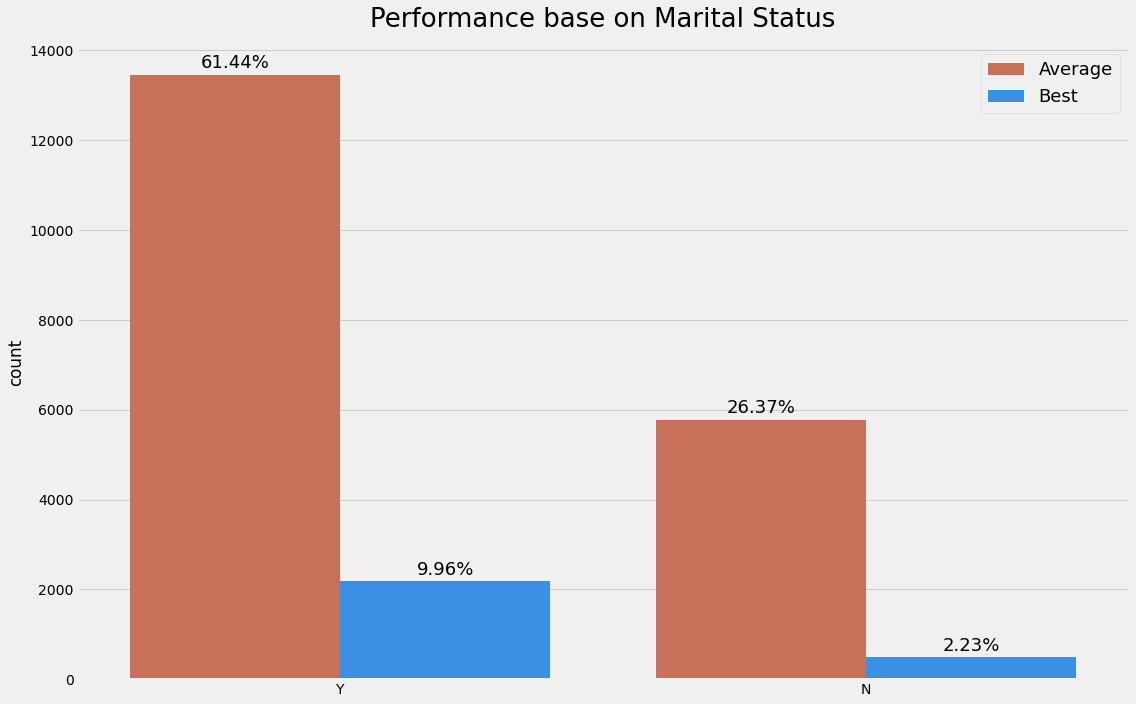

In [10]:
plt.figure(figsize=(16, 10))
axes = sns.countplot(train_df['marital_status_maried(Y/N)'], hue=train_df['Best Performance'], palette=['#d96548', 'dodgerblue'])
axes.set_title('Performance base on Marital Status', fontsize=26, pad=18)

for val in axes.patches:
    pct = '{:.2f}%'.format(100 * val.get_height() / train_df.shape[0])
    xpos = val.get_x() + val.get_width() / 2.
    ypos = val.get_height()
    axes.annotate(pct, (xpos, ypos), ha='center', va='center', fontsize=18, xytext=(0, 12), textcoords='offset points')

axes.set_xlabel(None)

plt.legend(['Average', 'Best'], fontsize=18)
plt.tight_layout()
plt.show()

### We got quite significant difference, married people are more productive at workplace

Married people have a family that depending on them, this makes them more serious & productive at workplace, this make sense

In [11]:
print("Already married at work", round(9.96 / (61.44 + 9.96), 3))
print("Have not married at work", round(2.23 / (26.37 + 2.23), 3))

Already married at work 0.139
Have not married at work 0.078


### Mantri = Marketing dan Analisis Mikro BRI

Mantri adalah petugas lapangan yang menangani masalah kredit pada BRI Unit, juga mempromosikan produk BRI dan mengajak masyarakat untuk berhubungan dengan BRI

Ada 3 tipe mantri pada dataset:
* Mantri Kupedes
* Mantri KUR
* Mantri Briguna

[More detail here](https://e-jurnal.stienobel-indonesia.ac.id/index.php/akmen/article/download/162/167/)

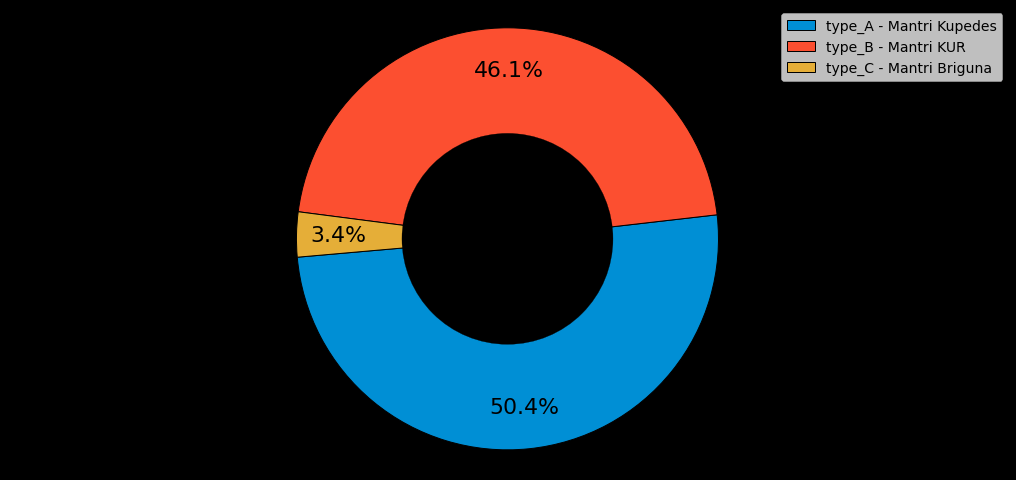

In [12]:
emp_count = train_df['Employee_type'].value_counts()

fig = plt.figure()
fig.patch.set_facecolor('black')

plt.pie(emp_count.values,
        labels=emp_count.index,
        autopct='%1.1f%%',
        pctdistance=0.8,
        textprops={'color': 'black', 'fontsize': 22},
        wedgeprops={'linewidth': 1, 'edgecolor': 'black'},
        labeldistance=None,
        startangle=185
)

centre_circle = plt.Circle((0, 0), 0.5, edgecolor='black',
                           facecolor='black', fill=True, linewidth=0.25)

p = plt.gcf()
p.gca().add_artist(centre_circle)

plt.legend(['type_A - Mantri Kupedes', 'type_B - Mantri KUR', 'type_C - Mantri Briguna'])
plt.axis('equal')
plt.show()

In [13]:
train_df.groupby('Employee_type')['Best Performance'].mean().round(3).sort_values(ascending=False).multiply(100)

Employee_type
RM_type_A    14.1
RM_type_C    12.4
RM_type_B    10.1
Name: Best Performance, dtype: float64

* 14.1 % Mantri Kupedes have a best performance, better than others
* Although we only have 3.4% Mantri Briguna in dataset, but 12.4% from them have a best performance

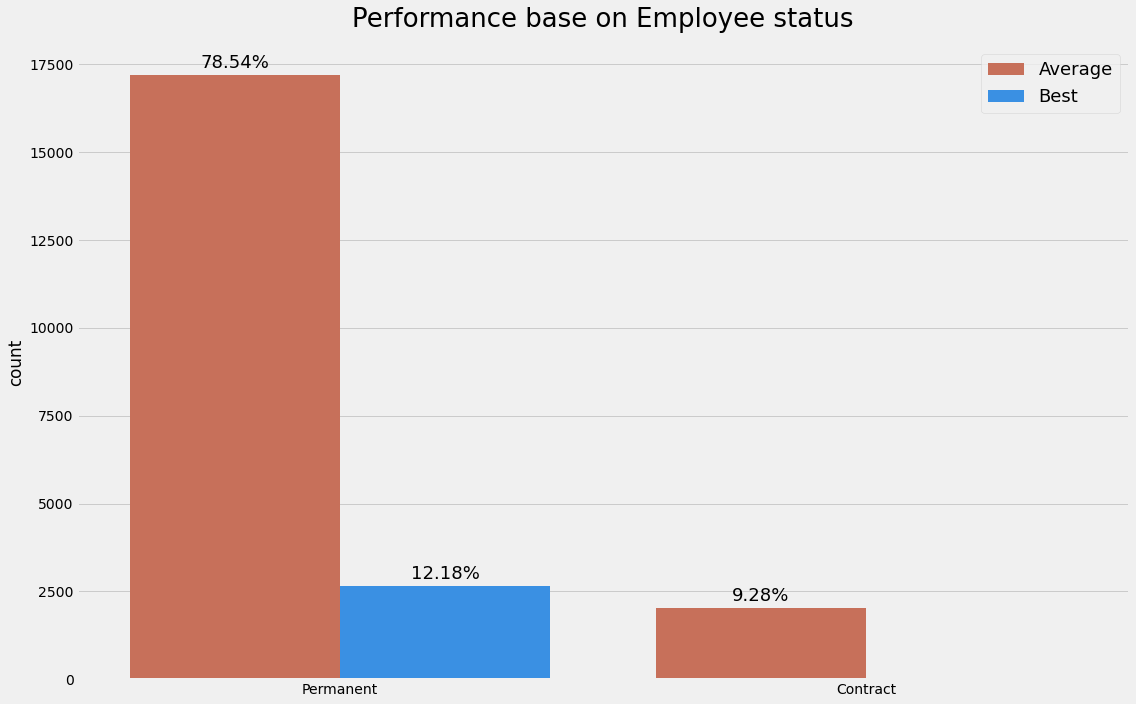

In [14]:
plt.figure(figsize=(16, 10))
axes = sns.countplot(train_df['Employee_status'], hue=train_df['Best Performance'], palette=['#d96548', 'dodgerblue'])
axes.set_title('Performance base on Employee status', fontsize=26, pad=18)

for val in axes.patches:
    pct = '{:.2f}%'.format(100 * val.get_height() / train_df.shape[0])
    xpos = val.get_x() + val.get_width() / 2.
    ypos = val.get_height()
    axes.annotate(pct, (xpos, ypos), ha='center', va='center', fontsize=18, xytext=(0, 12), textcoords='offset points')
    
axes.set_xlabel(None)

plt.legend(['Average', 'Best'], fontsize=18, loc=1)
plt.tight_layout()
plt.show()

### Why NONE of the workers on the contract period can give best performance?

In my opinion, employee on the contract should work more seriously to become a permanent employee, this is weird

In [15]:
train_df[train_df['Employee_status'] == 'Contract']['Best Performance'].sum()

0

## How about Education Level? Does it affect employee performance?

* This dataset show to us, SLTA (highschool) can became best performance employee, even better than S1 & S2
* Anyway this is because we only have 192 people with SLTA degree in this dataset, compare with 15192 people with S1 degree
* I personally believe education degree is very important, but love our job (passion) and work hard are more important

In [16]:
ed_level = train_df.groupby('Education_level').size().sort_values(ascending=False)
ed_level.rename(index={'level_0': 'Internal course',
                       'level_1': 'SLTA',
                       'level_2': 'D1',
                       'level_3': 'D3/D4',
                       'level_4': 'S1',
                       'level_5': 'S2'}, inplace=True)

ed_level

Education_level
S1                 15192
D3/D4               2802
SLTA                 192
S2                    64
Internal course       16
D1                     8
dtype: int64

In [17]:
ed_level_perform = train_df.groupby('Education_level')['Best Performance'].mean().round(3).sort_values(ascending=False).multiply(100)

ed_level_perform.rename(index={'level_0': 'Internal course',
                       'level_1': 'SLTA',
                       'level_2': 'D1',
                       'level_3': 'D3/D4',
                       'level_4': 'S1',
                       'level_5': 'S2'}, inplace=True)

ed_level_perform

Education_level
SLTA               17.7
S2                 15.6
S1                 11.5
D3/D4              11.5
Internal course     6.2
D1                  0.0
Name: Best Performance, dtype: float64

### Distribution in some training data & test data are different

* Different distribution maybe will affect our model prediction
* Anyway prediction on test data will calculate only 50%
* We don't know about distribution in private dataset, don't overfit to test dataset

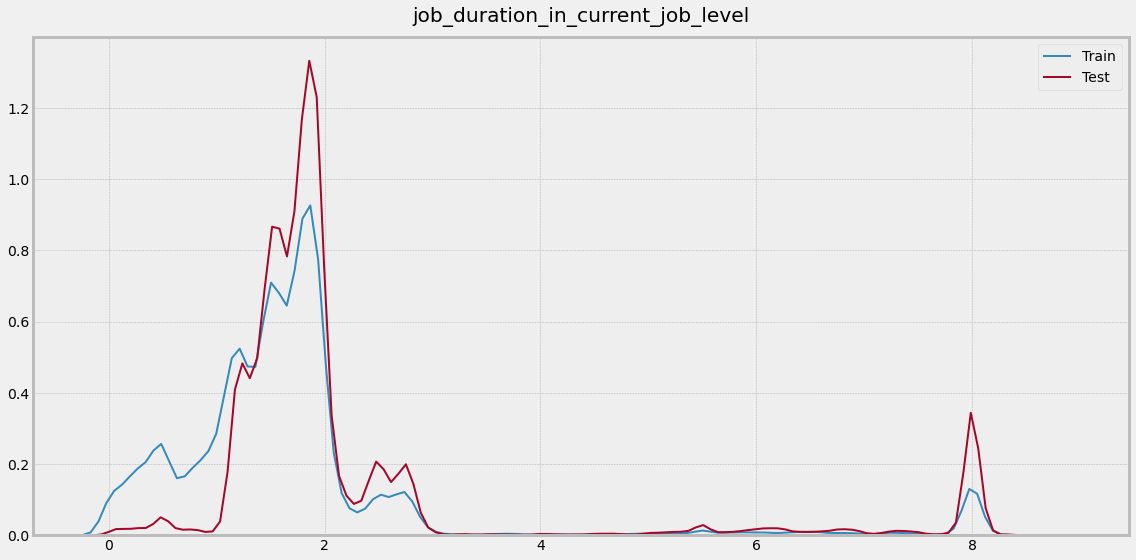

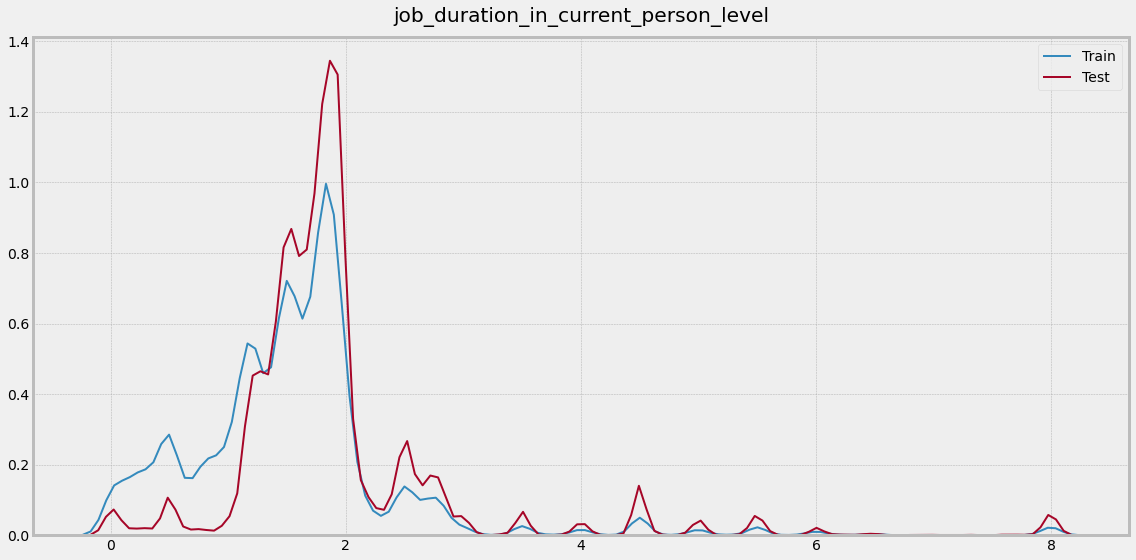

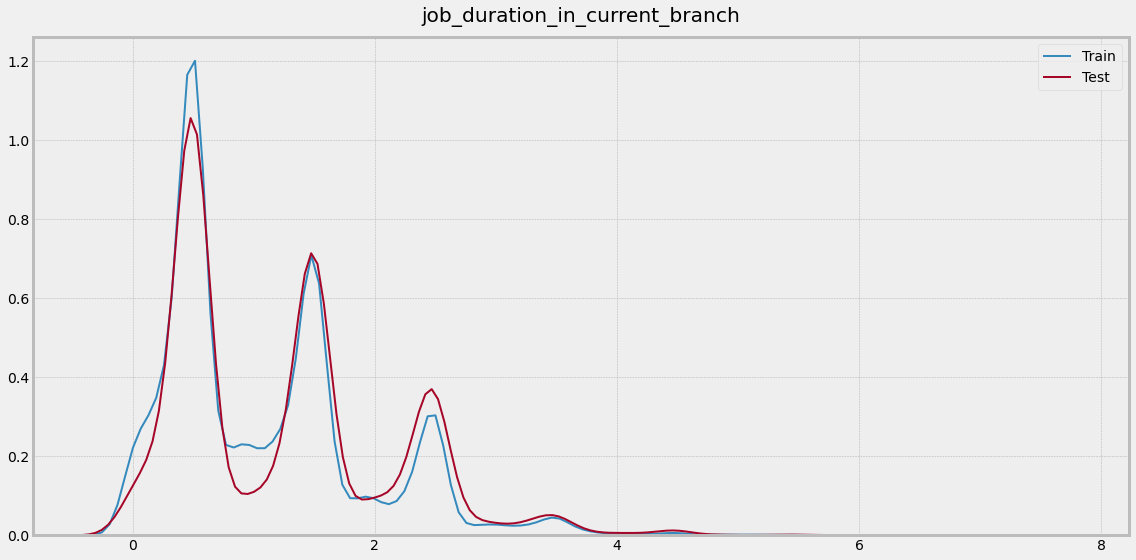

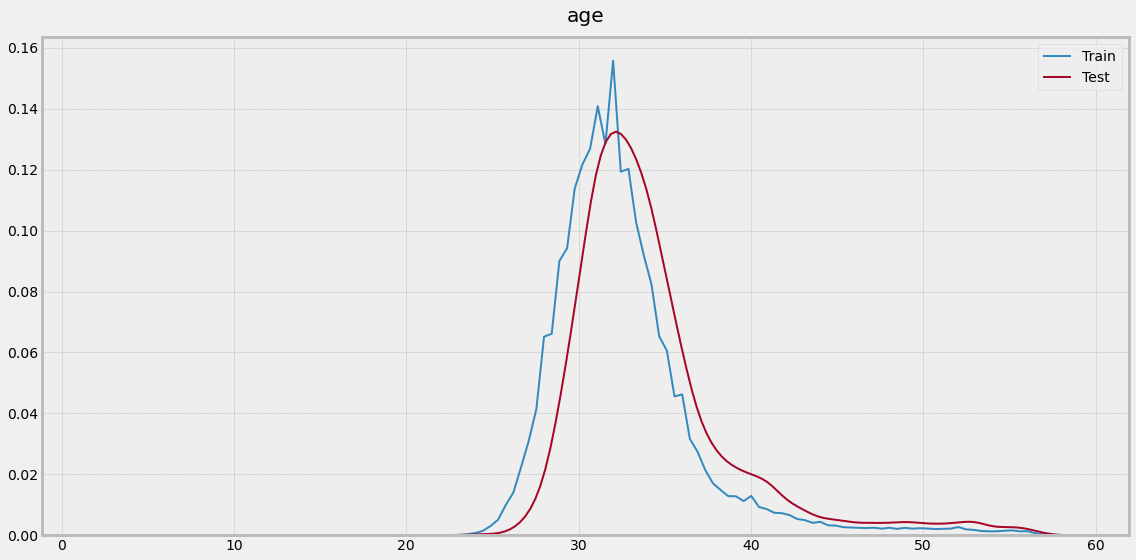

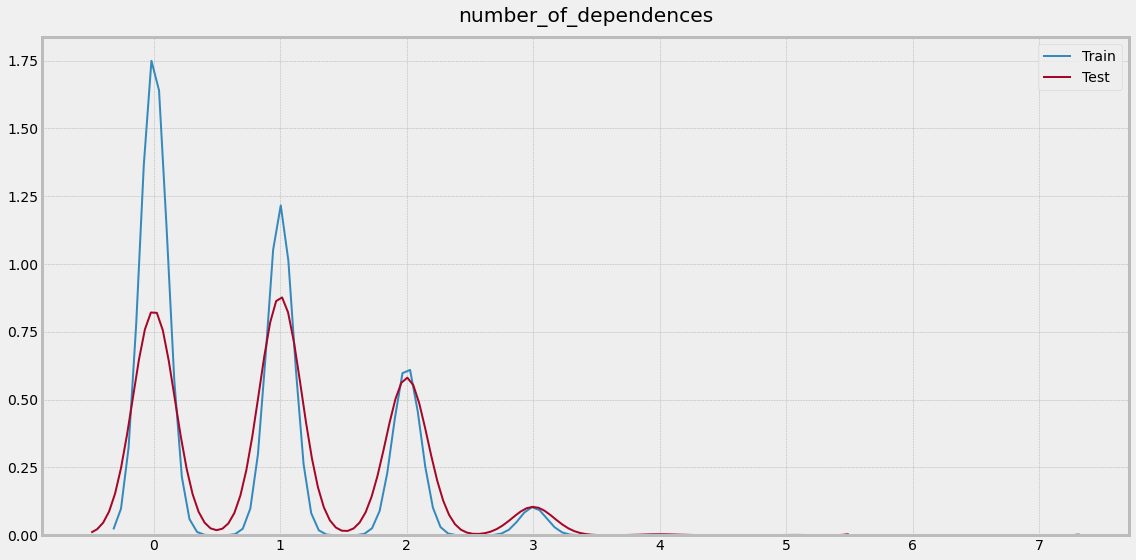

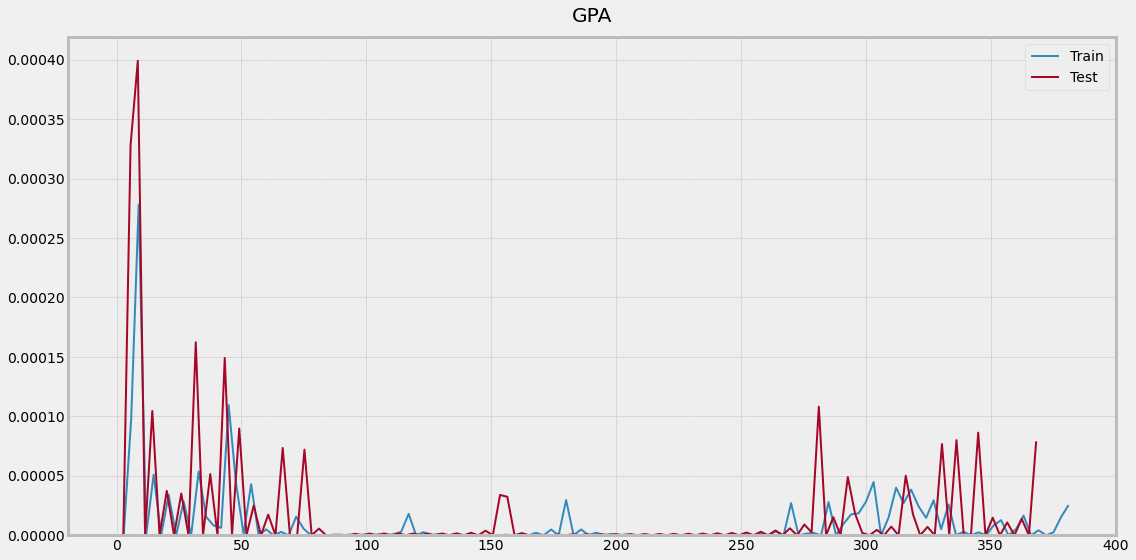

In [18]:
plt.style.use('bmh')
for col in ['job_duration_in_current_job_level', 'job_duration_in_current_person_level', 'job_duration_in_current_branch', 'age', 'number_of_dependences', 'GPA']:
    
    try:
        sns.distplot(train_df[col], hist=False, label='Train')
        sns.distplot(test_df[col], hist=False, label='Test')
        
        plt.xlabel(None)
        plt.title(col, pad=15)
        plt.tight_layout()
        plt.show()
        
    except:
        continue

## We need process to become best employee, sometimes this takes time

* job_duration_from_training : lama bekerja mulai dari training
* job_duration_as_permanent_worker : lama bekerja sebagai pekerja tetap

This dataset show to us, more employee give their best performance (on average) after reach 24 in job_duration_from_training & job_duration_as_permanent_worker

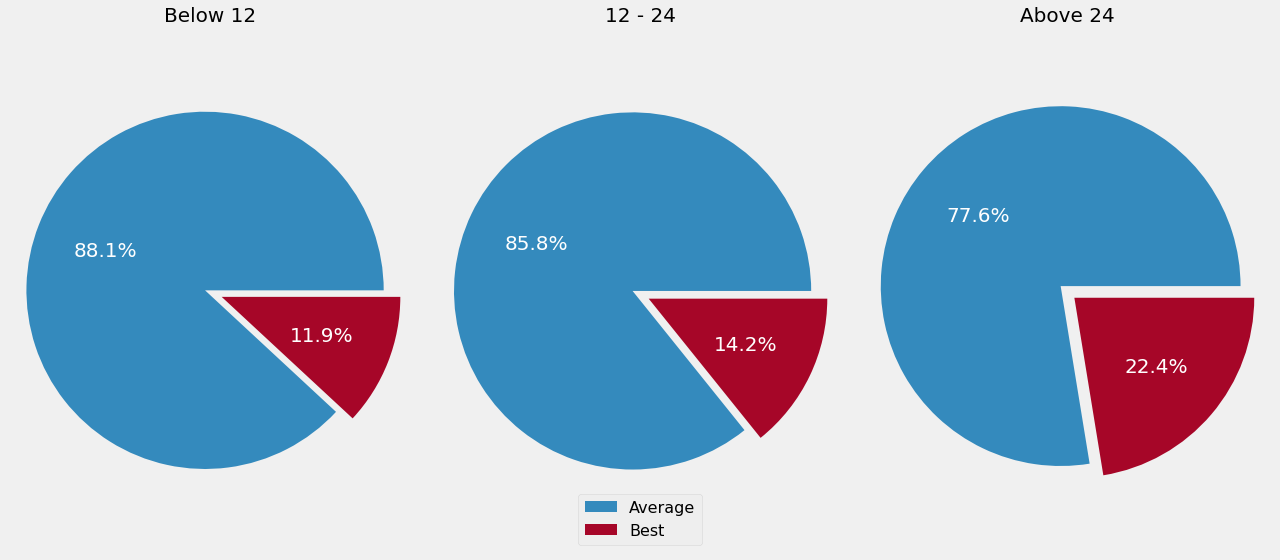

In [19]:
jobdur_from_training_under12 = train_df[train_df['job_duration_from_training'] <= 12]['Best Performance'].value_counts()
jobdur_from_training_up12un24 = train_df[(train_df['job_duration_from_training'] > 12) & (train_df['job_duration_from_training'] < 24)]['Best Performance'].value_counts()
jobdur_from_training_up24 = train_df[train_df['job_duration_from_training'] >= 24]['Best Performance'].value_counts()

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18, 8))

ax1.pie(jobdur_from_training_under12.values,
        labels=jobdur_from_training_under12.index,
        autopct='%.1f%%',
        textprops={'fontsize': 20, 'color': 'white'},
        labeldistance=None,
        explode=(0.1, 0)
)

ax2.pie(jobdur_from_training_up12un24.values,
        labels=jobdur_from_training_up12un24.index,
        autopct='%.1f%%',
        textprops={'fontsize': 20, 'color': 'white'},
        labeldistance=None,
        explode=(0.1, 0)
)

ax3.pie(jobdur_from_training_up24.values,
        labels=jobdur_from_training_up24.index,
        autopct='%.1f%%',
        textprops={'fontsize': 20, 'color': 'white'},
        labeldistance=None,
        explode=(0.1, 0)
)

ax1.set_title('Below 12 ', fontsize=20)
ax2.set_title('12 - 24', fontsize=20)
ax3.set_title('Above 24', fontsize=20)

ax2.legend(['Average', 'Best'], fontsize=16, loc=8)

ax1.axis('equal')
ax2.axis('equal')
ax3.axis('equal')

plt.tight_layout()
plt.show()

In [20]:
print('Minimal value:', train_df['job_duration_as_permanent_worker'].min())
print('Maximal value:', train_df['job_duration_as_permanent_worker'].max())
print('--------------------------------------------------------------------------------------------------------------')
print('job_duration_as_permanent_worker (below 12):', train_df[train_df['job_duration_as_permanent_worker'] <= 12]['Best Performance'].mean() * 100)
print('job_duration_as_permanent_worker (12 to 24):', train_df[(train_df['job_duration_as_permanent_worker'] > 12) & (train_df['job_duration_from_training'] < 24)]['Best Performance'].mean() * 100)
print('job_duration_as_permanent_worker (above 24):', train_df[train_df['job_duration_as_permanent_worker'] >= 24]['Best Performance'].mean() * 100)

Minimal value: 1.0
Maximal value: 34.0
--------------------------------------------------------------------------------------------------------------
job_duration_as_permanent_worker (below 12): 13.211019104833035
job_duration_as_permanent_worker (12 to 24): 14.44976076555024
job_duration_as_permanent_worker (above 24): 22.424242424242426


## We also have different values with same meaning in our dataset

In [21]:
import re

def remove_redundant_feat_1(text):
    
    text = re.sub(r'achiev_< 50%', 'Pencapaian < 50%', text)
    text = re.sub(r'achiev_50%-100%', 'Pencapaian 50%-100%', text)
    text = re.sub(r'achiev_100%-150%', 'Pencapaian 100%-150%', text)
    text = re.sub(r'achiev_> 1.5', 'Pencapaian > 1.5', text)
    
    return text
    

# train_df['achievement_target_1'] = train_df['achievement_target_1'].apply(remove_redundant_feat)
# train_df['achievement_target_2'] = train_df['achievement_target_2'].apply(remove_redundant_feat)
# train_df['achievement_target_3'] = train_df['achievement_target_3'].apply(lambda x: re.sub(r'not_reached', 'not reached', x))

# test_df['achievement_target_1'] = test_df['achievement_target_1'].apply(remove_redundant_feat)
# test_df['achievement_target_2'] = test_df['achievement_target_2'].apply(remove_redundant_feat)
# test_df['achievement_target_3'] = test_df['achievement_target_3'].apply(lambda x: re.sub(r'not_reached', 'not reached', x))

In [22]:
##############################################################################################################

## PASSION in WORK

Hope this video can help a lot of people to be able to find their passion in workplace

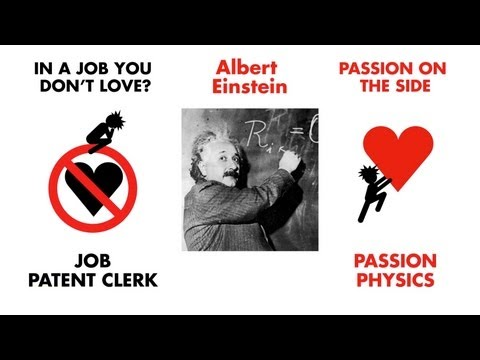

In [23]:
from IPython.display import YouTubeVideo

YouTubeVideo('tNu6on8dk2o', width=800, height=450)